In [84]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from adjustText import adjust_text
from pandas import json_normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

In [85]:
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["font.family"] = "IPAexGothic"  #'Times New Roman'

In [86]:
class CFG:
    input_dir = "../input"
    output_dir = "../output"
    random_seed = 42
    exp_no = "eda"

In [87]:
train_df = pd.read_csv(f"{CFG.input_dir}/chapter2_demo_data_postprocess.csv")
train_df

,サンプルID,サンプル名,サンプル作成日,担当者,備考,溶媒１,溶媒2,溶媒3,添加剤1,添加剤2,...,乾燥温度,乾燥時間,擦過回数,擦過圧力,耐擦過性(n10,画像濃度,粘度,表面張力,保存後粘度,保存後状態
0,DP_001,界1_2.0,2024/1/19,高岡,界面活性剤1水準振り,46.9,40,0,2,0,...,25,NaN,10,5,2.4,1.06,9.0,35,NaN,NaN
1,DP_002,界1_1.5,2024/1/19,高岡,界面活性剤1水準振り,47.4,40,0,2,0,...,25,NaN,10,5,2.4,1.07,9.0,38,NaN,NaN
2,DP_003,界1_1.2,2024/1/19,高岡,界面活性剤1水準振り,47.7,40,0,2,0,...,25,NaN,10,5,2.4,1.07,9.0,40,NaN,NaN
3,DP_004,界1_1.0,2024/1/19,高岡,界面活性剤1水準振り,47.9,40,0,2,0,...,25,NaN,10,5,2.4,1.08,9.0,41,NaN,NaN
4,DP_005,界1_0.5,2024/1/19,高岡,界面活性剤1水準振り,48.4,40,0,2,0,...,25,NaN,10,5,2.4,1.09,9.0,44,NaN,NaN
5,DP_006,界1_1.5_樹1_4.0_ref,2024/1/30,福原,ref,47.4,40,0,2,0,...,25,NaN,10,5,2.7,1.07,9.1,38,NaN,NaN
6,DP_007,界2_1.5_樹1_4.0,2024/1/30,福原,界面活性剤1種類検討,47.4,40,0,2,0,...,25,NaN,10,5,2.7,1.05,9.1,37,NaN,NaN
7,DP_008,界3_1.5_樹1_4.0,2024/1/30,福原,界面活性剤1種類検討,47.4,40,0,2,0,...,25,NaN,10,5,2.7,1.02,9.1,39,NaN,NaN
8,DP_009,界1_1.5_樹1_6.0,2024/1/30,福原,定着樹脂１水準振り,45.4,40,0,2,0,...,25,NaN,10,5,3.1,1.07,10.3,36,NaN,NaN
9,DP_010,界1_1.5_樹1_8.0,2024/1/30,福原,定着樹脂１水準振り,43.4,40,0,2,0,...,25,NaN,10,5,3.6,1.07,11.5,34,NaN,NaN


In [88]:
# train_dfの列名をリストで取得
columns = train_df.columns
# train_dfの列名を表示
columns

Index(['サンプルID', 'サンプル名', 'サンプル作成日', '担当者', '備考', '溶媒１', '溶媒2', '溶媒3', '添加剤1',
       '添加剤2', '界面活性剤１', '界面活性剤２', '界面活性剤３', '顔料１', '顔料２', '定着樹脂１', '定着樹脂２',
       '防腐剤', '塗布量', '乾燥方式', '乾燥温度', '乾燥時間', '擦過回数', '擦過圧力', '耐擦過性(n10',
       '画像濃度', '粘度', '表面張力', '保存後粘度', '保存後状態'],
      dtype='object')

In [89]:
# 欠損のある列を表示
train_df.isnull().sum()

サンプルID       0
サンプル名        0
サンプル作成日      0
担当者          0
備考           0
溶媒１          0
溶媒2          0
溶媒3          0
添加剤1         0
添加剤2         0
界面活性剤１       0
界面活性剤２       0
界面活性剤３       0
顔料１          0
顔料２          0
定着樹脂１        0
定着樹脂２        0
防腐剤          0
塗布量          0
乾燥方式         0
乾燥温度         0
乾燥時間        14
擦過回数         0
擦過圧力         0
耐擦過性(n10     0
画像濃度         0
粘度           0
表面張力         0
保存後粘度       26
保存後状態       26
dtype: int64

In [90]:
numeric_parameter_cols = [
    # 'サンプルID', 'サンプル名', 'サンプル作成日', '担当者', '備考',
    "溶媒１",
    "溶媒2",
    "溶媒3",
    "添加剤1",
    "添加剤2",
    "界面活性剤１",
    "界面活性剤２",
    "界面活性剤３",
    "顔料１",
    "顔料２",
    "定着樹脂１",
    "定着樹脂２",
    "防腐剤",
    "塗布量",
    "乾燥方式",
    "乾燥温度",
    # '乾燥時間',
    "擦過回数",
    "擦過圧力",
    # '耐擦過性(n10','画像濃度', '粘度', '表面張力', '保存後粘度'
]

## ヒストグラムの確認

In [91]:
objective_cols = ["耐擦過性(n10", "画像濃度", "粘度", "表面張力", "保存後粘度"]

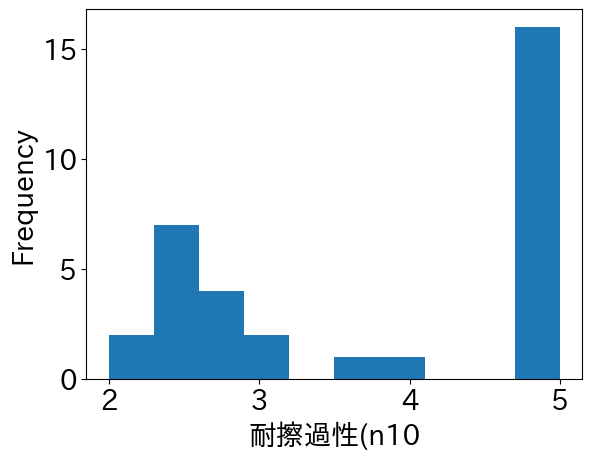

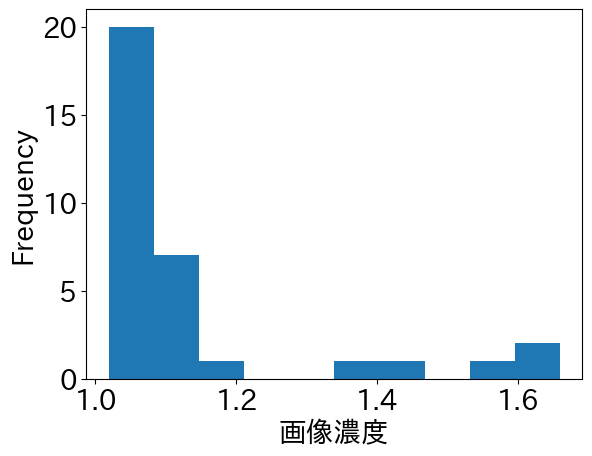

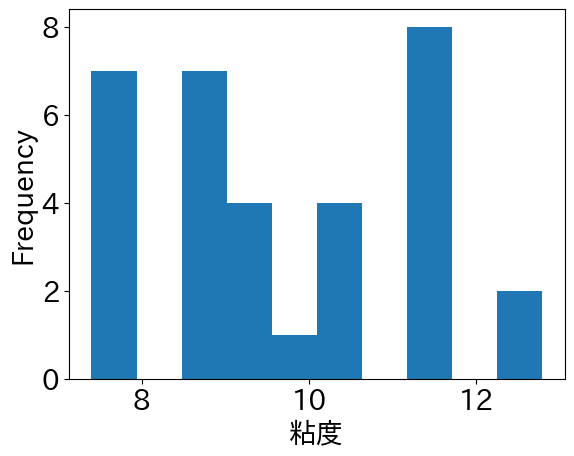

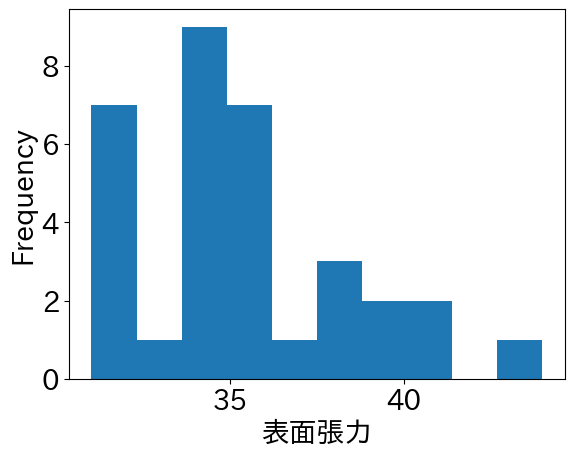

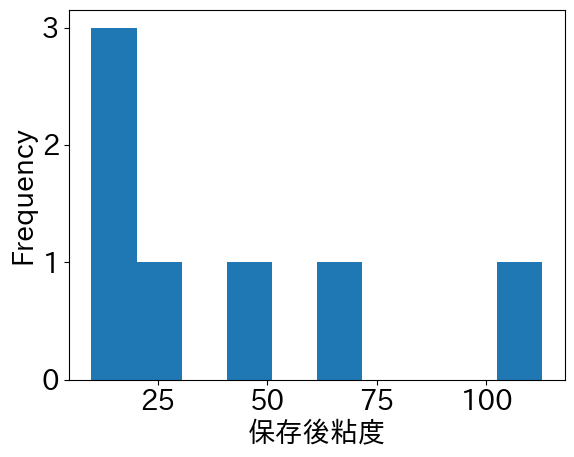

In [92]:
for col in objective_cols:
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

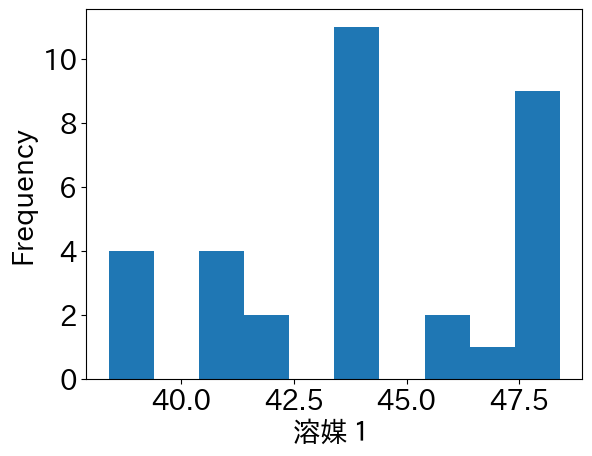

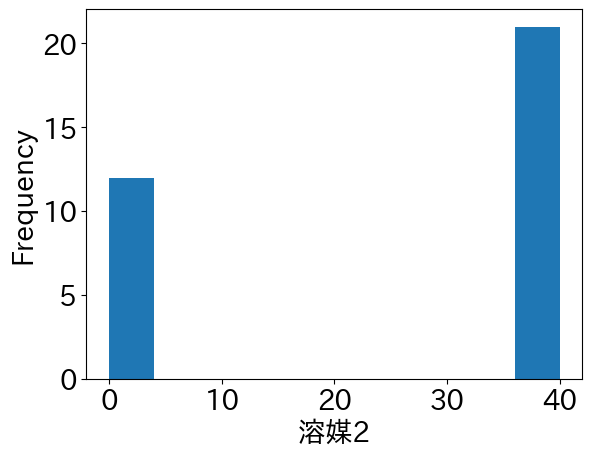

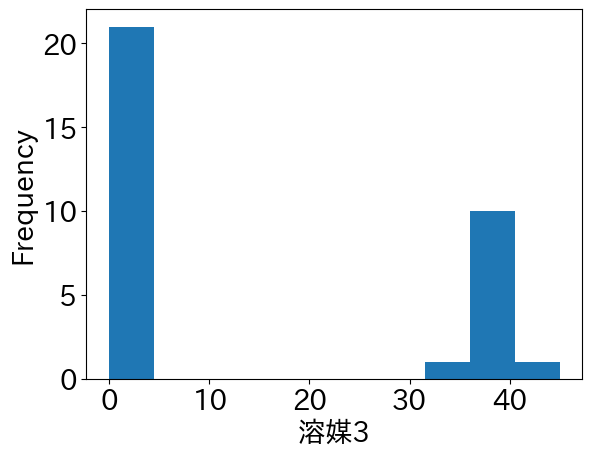

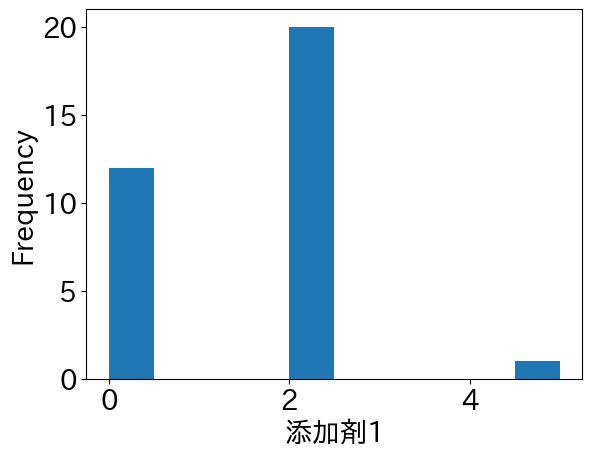

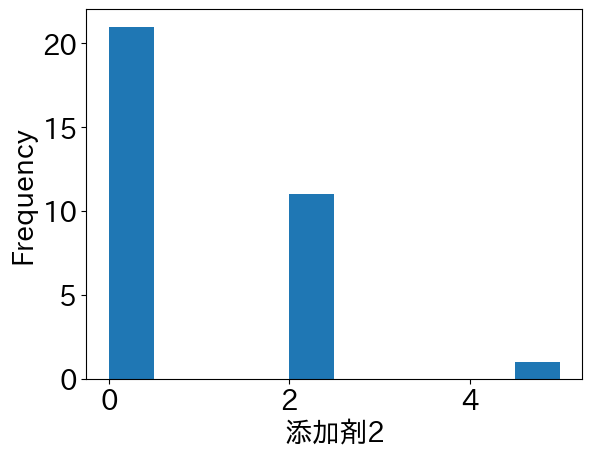

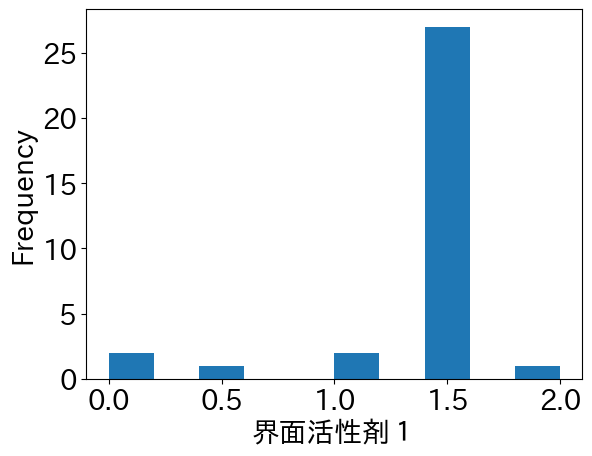

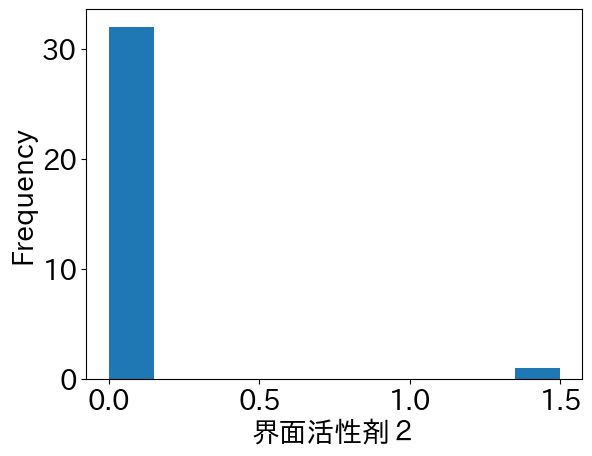

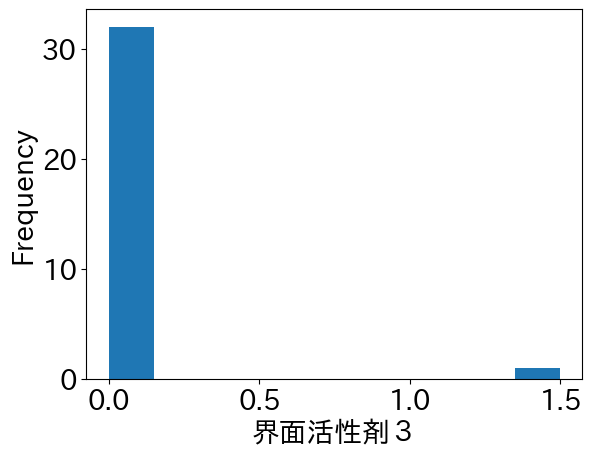

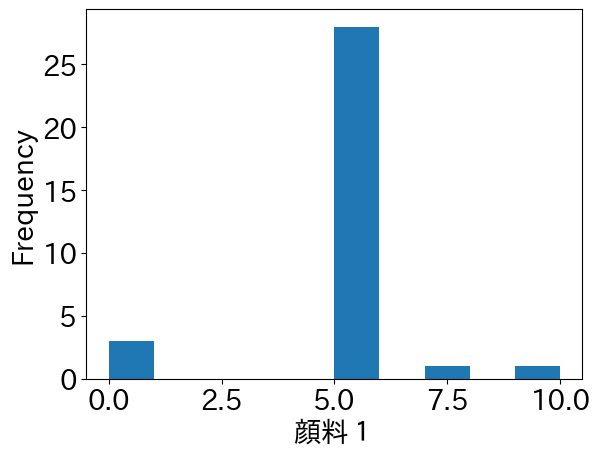

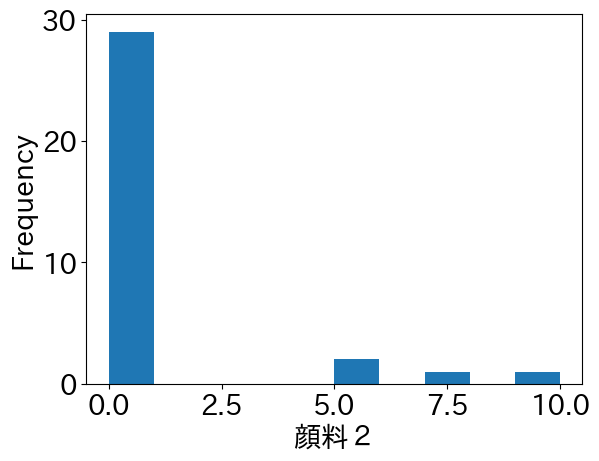

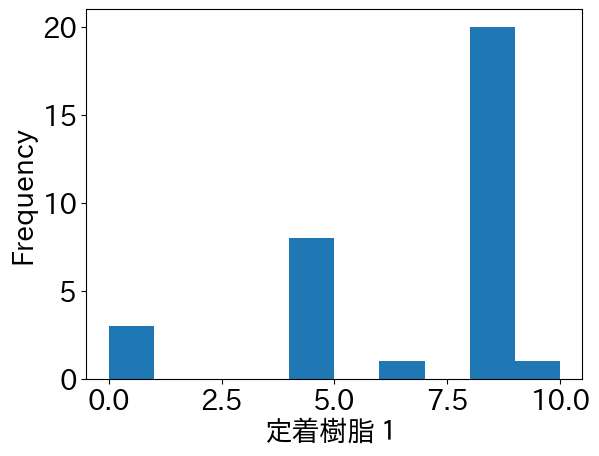

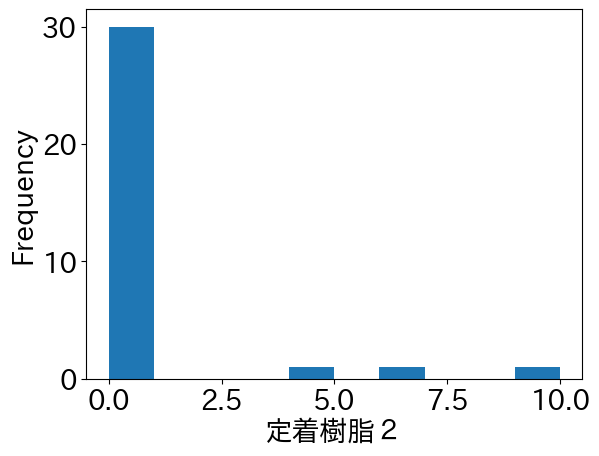

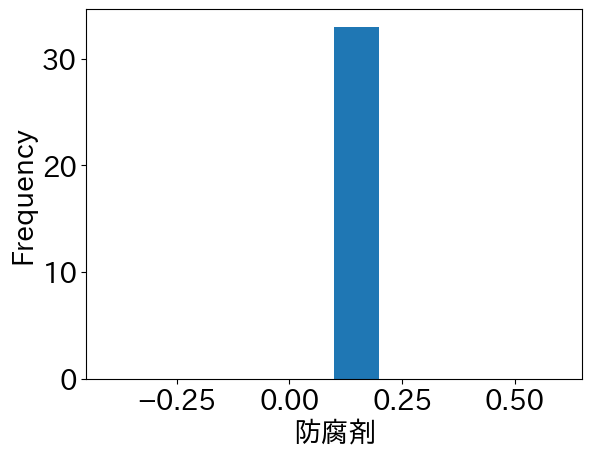

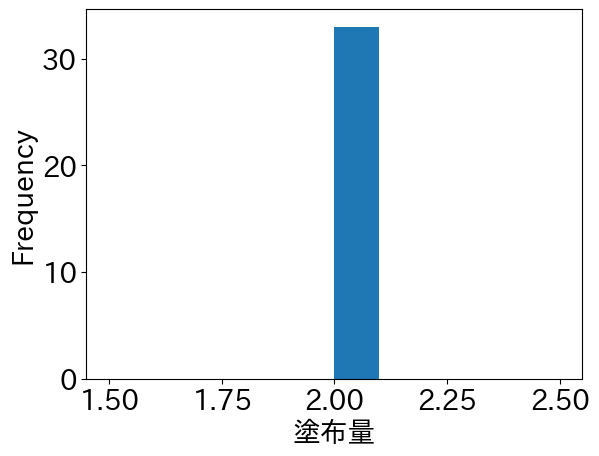

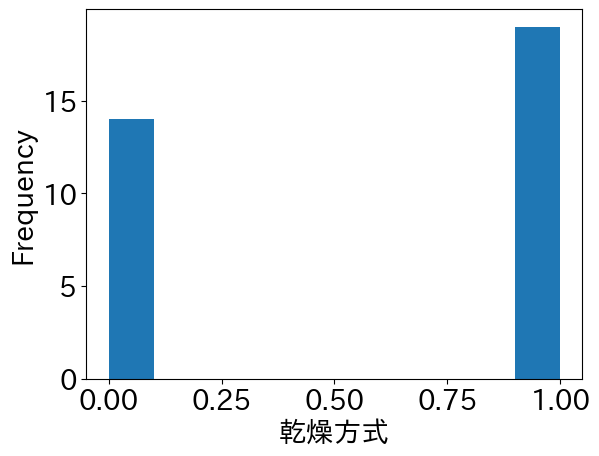

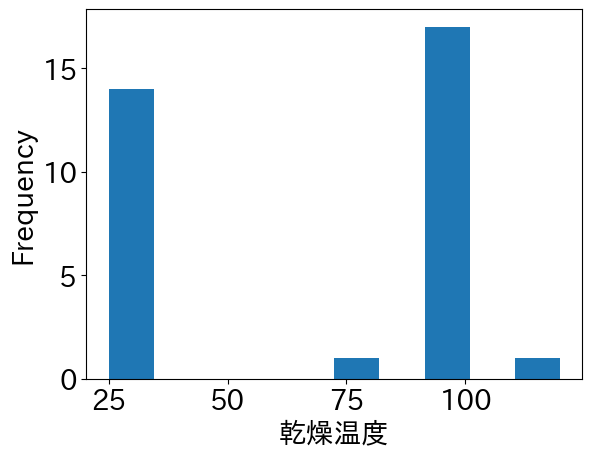

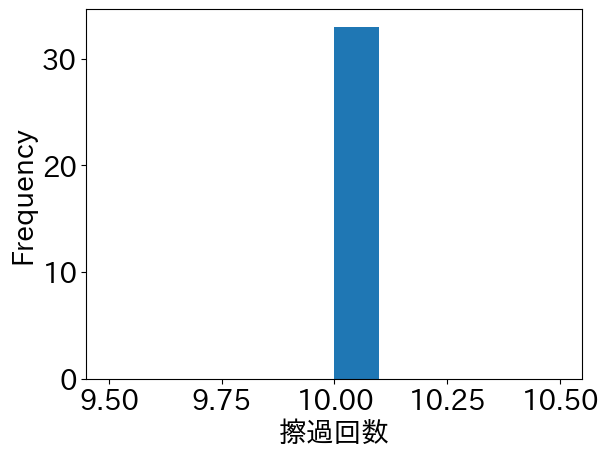

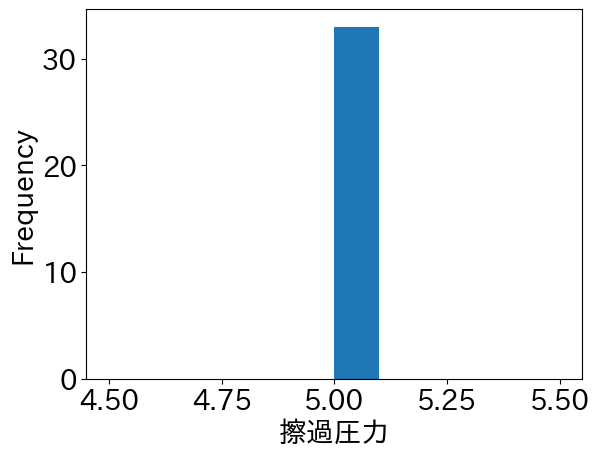

In [93]:
# numeric_parameter_colsそれぞれのhistgramをplt.histで描画、x軸のラベルは列名、y軸のラベルは頻度
for col in numeric_parameter_cols:
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 可視化条件の検討

In [94]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(train_df[numeric_parameter_cols])
X_train

array([[ 1.00830673,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         1.53976945, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.16797142,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         0.31831772, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.26377024,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.41455331, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.32763612,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.903134  , -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.   

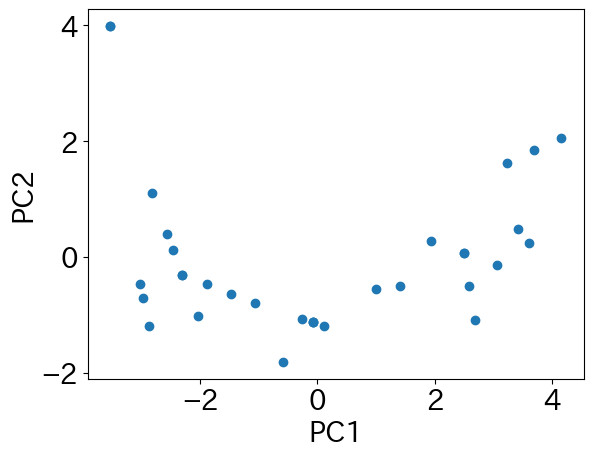

In [95]:
# PCAを実行、n_components=2、random_state=CFG.random_seed
pca = PCA(n_components=2, random_state=CFG.random_seed)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

# X_train_pcaをDataFrameに変換
train_pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])

# train_pca_dfの散布図を描画
plt.scatter(train_pca_df["PC1"], train_pca_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

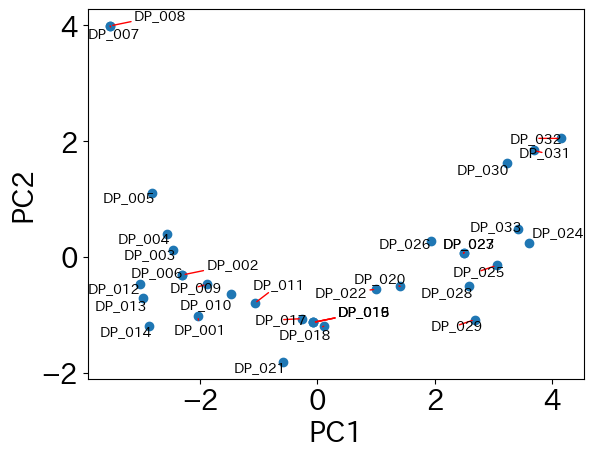

In [96]:
# PCAを実行、n_components=2、random_state=CFG.random_seed
pca = PCA(n_components=2, random_state=CFG.random_seed)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

# X_train_pcaをDataFrameに変換
train_pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])

# train_pca_dfの散布図を描画
plt.scatter(train_pca_df["PC1"], train_pca_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_pca_df["PC1"][i],
        train_pca_df["PC2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_pca_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

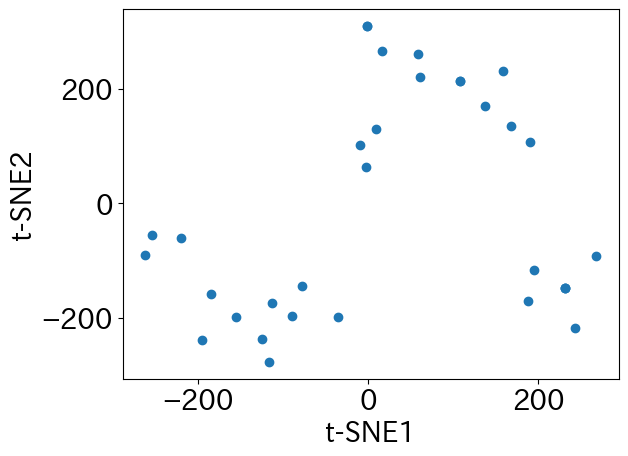

In [97]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=5
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

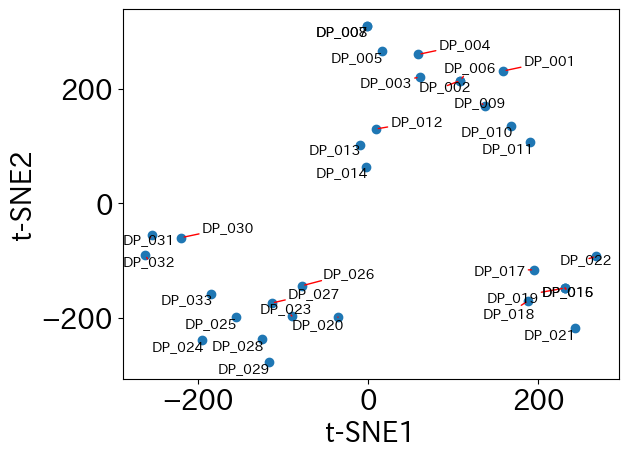

In [98]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=5
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_tsne_df["t-SNE1"][i],
        train_tsne_df["t-SNE2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_tsne_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

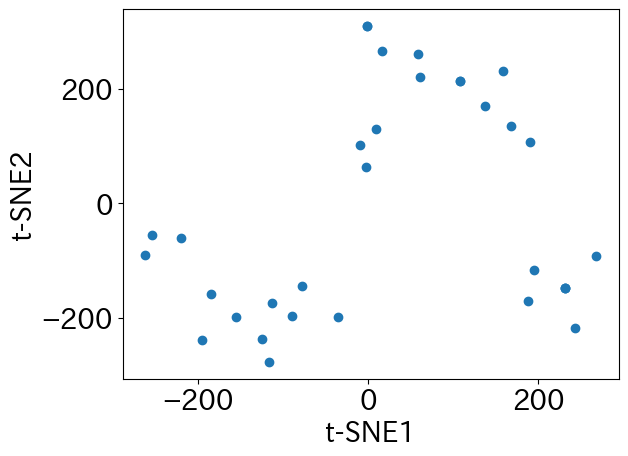

In [99]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=10
)  # perplexity must be less than n_samples、デフォルト値は30であるため、デフォルトだと今回はエラーになる
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

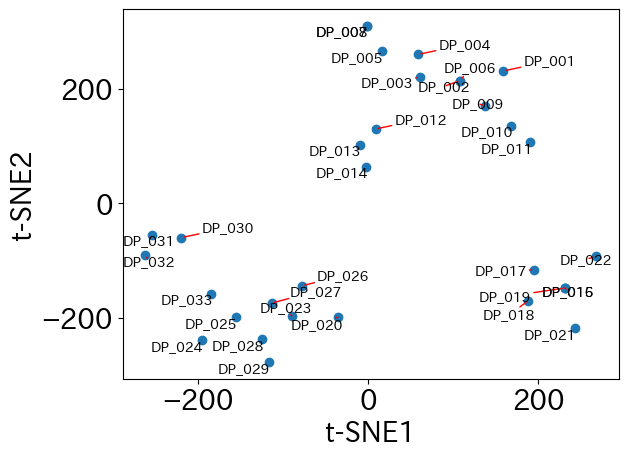

In [100]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=10
)  # perplexity must be less than n_samples、デフォルト値は30であるため、デフォルトだと今回はエラーになる
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_tsne_df["t-SNE1"][i],
        train_tsne_df["t-SNE2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_tsne_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

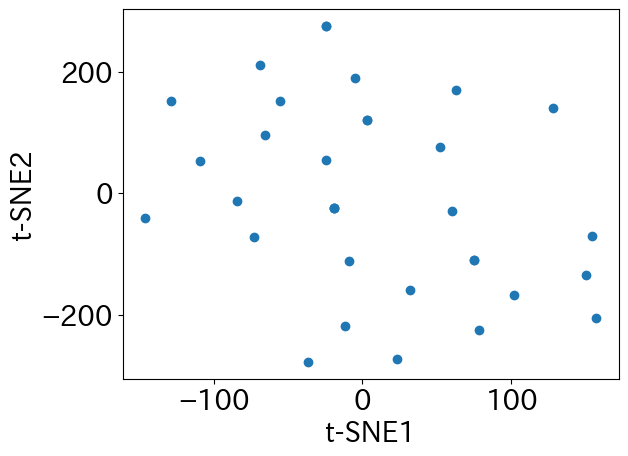

In [101]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=20
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

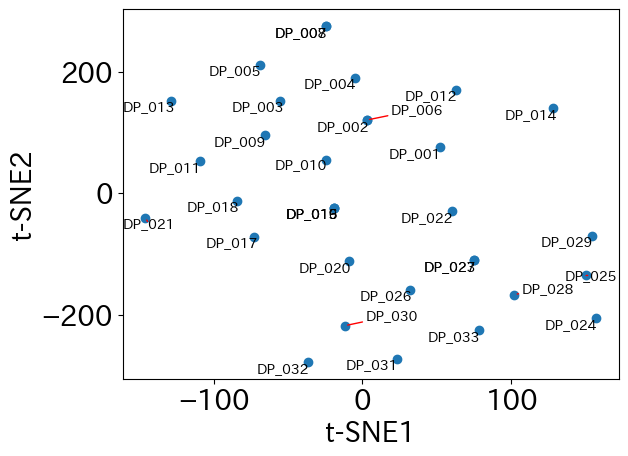

In [102]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=20
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_tsne_df["t-SNE1"][i],
        train_tsne_df["t-SNE2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_tsne_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


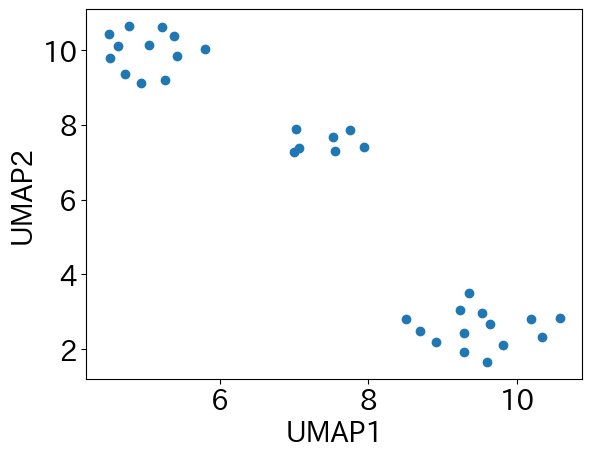

In [103]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


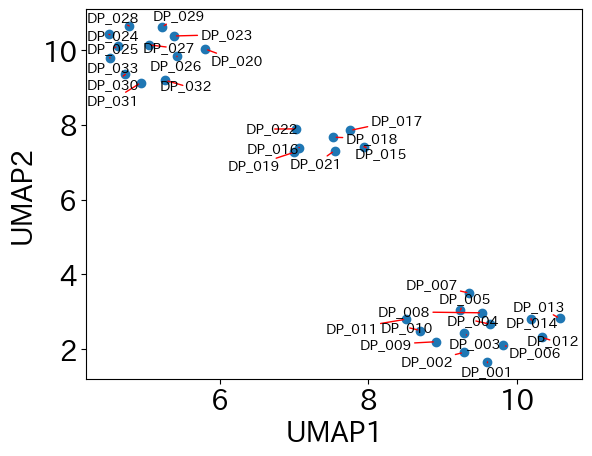

In [104]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


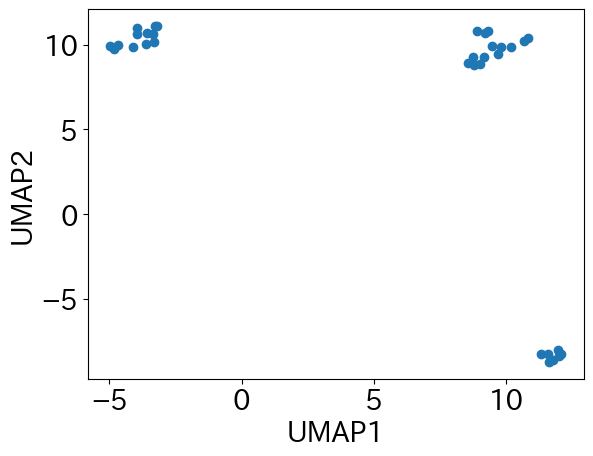

In [105]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


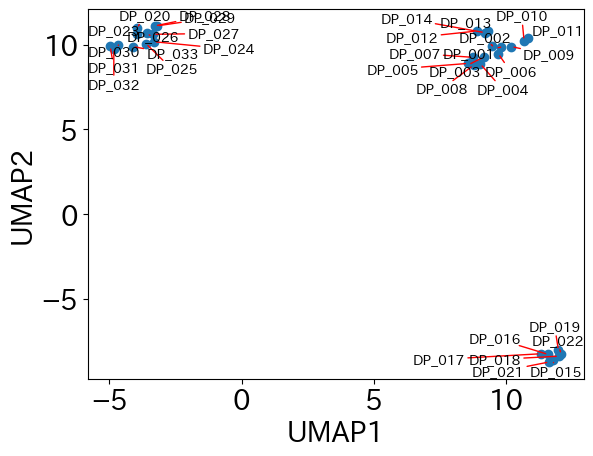

In [106]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


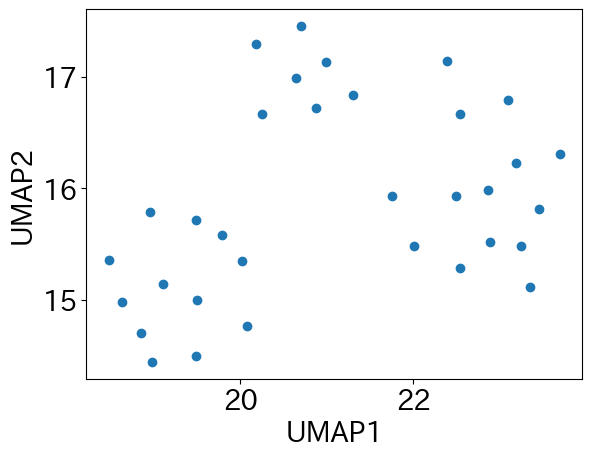

In [107]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=30
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


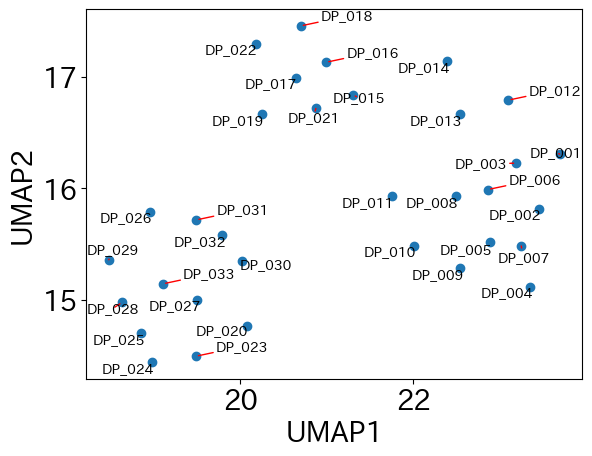

In [108]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=30
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## 次元削減による可視化

In [109]:
objective_cols = ["耐擦過性(n10", "画像濃度", "粘度", "表面張力", "保存後粘度"]

c:\Users\jackp\anaconda3\envs\VScode\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


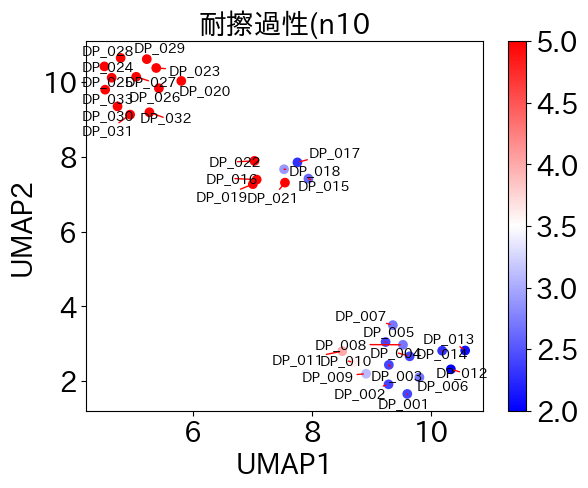

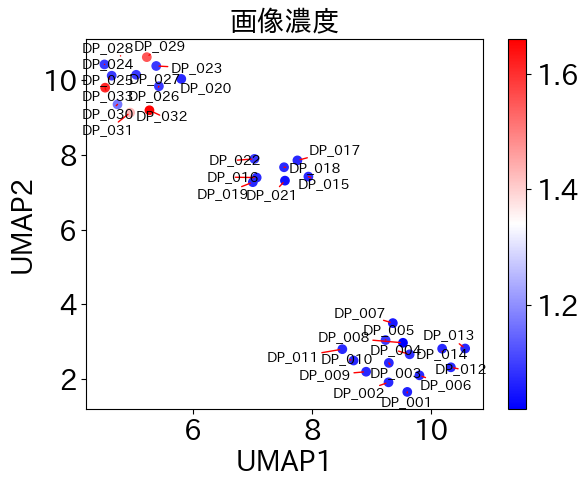

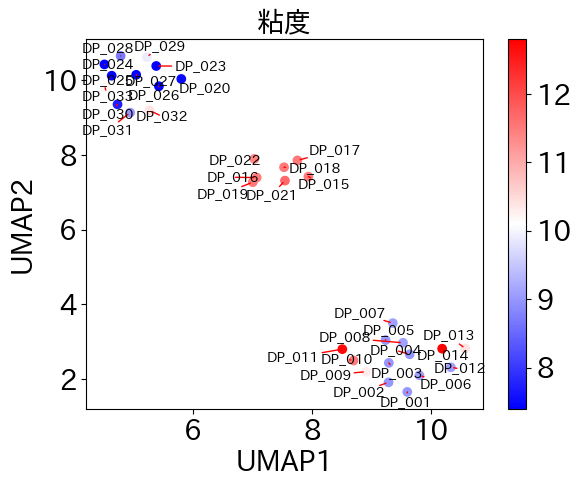

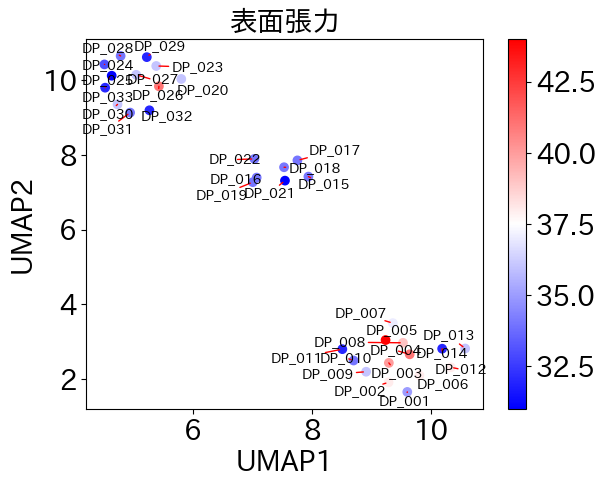

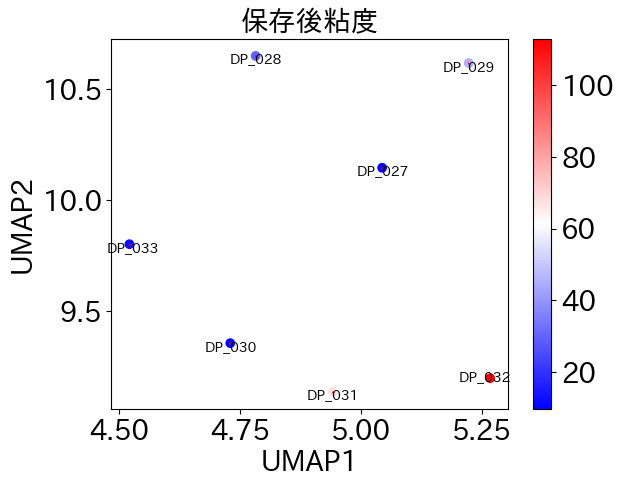

In [110]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

plot_df = pd.concat([train_umap_df,train_df],axis=1)

for col in objective_cols:
    # train_umap_dfの散布図を描画
    plot_df_dropna = plot_df.dropna(subset=col).reset_index(drop=True)

    plt.scatter(plot_df_dropna["UMAP1"], plot_df_dropna["UMAP2"],c=plot_df_dropna[col],cmap=plt.colormaps['bwr'])
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    # plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
    texts = [
        plt.text(
            plot_df_dropna["UMAP1"][i],
            plot_df_dropna["UMAP2"][i],
            plot_df_dropna["サンプルID"][i],
            fontsize=10,
        )
        for i in range(len(plot_df_dropna))
    ]
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
    plt.colorbar()
    plt.title(col)
    plt.show()